# Lecture on Data handling with Pandas

In addition to Series, this lecture introduces 'DataFrame', which is a python class and most Python data sets are formed as. DataFrames collect multiple (Pandas) Series. Thus, a DataFrame is like a two-dimensional NumPy array – and when all data is numeric and of the same type (e.g. float64), it is virtually indistinguishable. However, as mentioned, a DataFrame consists of Series, and each Series has its own data type.

A number of methods are available to initialize a DataFrame. The simplest method uses a homogeneous NumPy array. But, many data sets we download or import can be already given as DataFrame.

## Basics

In [1]:
import pandas as pd
import numpy as np

In [2]:
A = np.array([[1.0,2],[3,4]]) # a 2 by 2 array
A

array([[1., 2.],
       [3., 4.]])

In [3]:
df = pd.DataFrame(A) # We can change it into a DataFrame.

In [4]:
df # Alternatively, you can type print(df)

,0,1
0,1.0,2.0
1,3.0,4.0


You may want to add names to each column. You can use columns=[ ]

In [5]:
df = pd.DataFrame(np.array([[1,2],[3,4]]),columns=['a','b'])
df

,a,b
0,1,2
1,3,4


In [6]:
# You can change names of the columns using .columns method
df.columns = ['dogs','cats']
df

,dogs,cats
0,1,2
1,3,4


In [7]:
# Row names are referred to as index. You can do similar changes
df = pd.DataFrame(np.array([[1,2],[3,4]]), columns=['dogs','cats'],index=['Alice','Bob'])

In [8]:
df

,dogs,cats
Alice,1,2
Bob,3,4


## How to manage time series or panel data

Pandas provides a powerful toolkit to make and manipulate data with time series involved. Python has a built-in module 'datetime' that Pandas can interact with. We can do most of the things we learned in list, tuple, and

In [9]:
import datetime as dt

Create Dates and Time

In [10]:
yr, mo, dd = 2021, 12, 28

dt.date(yr,mo,dd)

datetime.date(2021, 12, 28)

In [11]:
hr, mm, ss, ms = 15, 30, 58, 20

dt.time(hr,mm,ss,ms)

datetime.time(15, 30, 58, 20)

In [12]:
dt.datetime(yr,mo,dd,hr,mm,ss,ms)

datetime.datetime(2021, 12, 28, 15, 30, 58, 20)

You can subtract Datetimes and dates (not times, though) to produce a 'timedelta' type

In [13]:
d1 = dt.datetime(yr,mo,dd,hr,mm,ss,ms)
d2 = dt.datetime(yr+1,mo,dd,hr,mm,ss,ms)
d3 = dt.datetime(yr,mo,dd+1,hr,mm,ss,ms)

In [14]:
d2

datetime.datetime(2022, 12, 28, 15, 30, 58, 20)

In [15]:
d2-d1

datetime.timedelta(days=365)

In [16]:
d3-d2

datetime.timedelta(days=-364)

In [17]:
d3-d1

datetime.timedelta(days=1)

In [18]:
d2 + dt.timedelta(10,0,0) #ten days added

datetime.datetime(2023, 1, 7, 15, 30, 58, 20)

In [19]:
dt.date(2020,10,30) + dt.timedelta(30,0,0)

datetime.date(2020, 11, 29)

In [20]:
# Google Colab has some issues with yahoo finance api. Need to update pandas_datareader Un# the two lines below, if you use an offline Python.
!pip show pandas_datareader



Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, pandas, requests
Required-by: 


In [21]:
!pip install --upgrade pandas_datareader

We import pandas_datareader.data to downlowad data sets. We will use this library for various databases avaialble onine.


In [22]:
!pip install yfinance

In [23]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [24]:
yf.pdr_override()

In [25]:
#import datetime as dt

In [26]:
# For time indexing, you can use either method.


startd = dt.datetime(2020, 1, 2)
endd = dt.datetime(2022, 1, 3)

In [27]:
import pandas_datareader.data as web

In [28]:
Ticker = ["AAPL","AMZN","MSFT","GOOG","TSLA","SPY"]
#data = web.DataReader(Ticker, 'yahoo'startd, endd)
data = web.get_data_yahoo(Ticker, start="2017-01-01", end="2020-04-30")

[*********************100%%**********************]  6 of 6 completed


In [29]:
data

Price       Adj Close                                                 \
Ticker           AAPL        AMZN       GOOG        MSFT         SPY   
Date                                                                   
2017-01-03  26.989265   37.683498  39.306999   57.138729  199.819534   
2017-01-04  26.959061   37.859001  39.345001   56.883068  201.008301   
2017-01-05  27.096153   39.022499  39.701000   56.883068  200.848587   
2017-01-06  27.398232   39.799500  40.307499   57.376118  201.567200   
2017-01-09  27.649183   39.846001  40.332500   57.193504  200.901825   
...               ...         ...        ...         ...         ...   
2020-04-23  67.059158  119.972504  63.815498  165.638016  263.601929   
2020-04-24  68.995117  120.511002  63.965500  168.662415  267.276093   
2020-04-27  69.043907  118.800003  63.793999  168.179306  271.129822   
2020-04-28  67.924736  115.704002  61.683498  164.082306  269.883087   
2020-04-29  70.155754  118.635498  67.073997  171.445251  276.948212   

Price                      Close                                     ...  \
Ticker           TSLA       AAPL        AMZN       GOOG        MSFT  ...   
Date                                                                 ...   
2017-01-03  14.466000  29.037500   37.683498  39.306999   62.580002  ...   
2017-01-04  15.132667  29.004999   37.859001  39.345001   62.299999  ...   
2017-01-05  15.116667  29.152500   39.022499  39.701000   62.299999  ...   
2017-01-06  15.267333  29.477501   39.799500  40.307499   62.840000  ...   
2017-01-09  15.418667  29.747499   39.846001  40.332500   62.639999  ...   
...               ...        ...         ...        ...         ...  ...   
2020-04-23  47.042000  68.757500  119.972504  63.815498  171.419998  ...   
2020-04-24  48.343334  70.742500  120.511002  63.965500  174.550003  ...   
2020-04-27  53.250000  70.792503  118.800003  63.793999  174.050003  ...   
2020-04-28  51.274666  69.644997  115.704002  61.683498  169.809998  ...   
2020-04-29  53.367332  71.932503  118.635498  67.073997  177.429993  ...   

Price            Open                                        Volume  \
Ticker           GOOG        MSFT         SPY       TSLA       AAPL   
Date                                                                  
2017-01-03  38.940498   62.790001  225.039993  14.324000  115127600   
2017-01-04  39.417999   62.480000  225.619995  14.316667   84472400   
2017-01-05  39.304001   62.189999  226.270004  15.094667   88774400   
2017-01-06  39.763000   62.299999  226.529999  15.128667  127007600   
2017-01-09  40.320000   62.759998  226.910004  15.264667  134247600   
...               ...         ...         ...        ...        ...   
2020-04-23  63.577499  174.110001  280.489990  48.506668  124814400   
2020-04-24  63.058498  172.059998  280.730011  47.387333  126161200   
2020-04-27  64.800003  176.589996  285.119995  49.174000  117087600   
2020-04-28  64.396500  175.589996  291.019989  53.042667  112004800   
2020-04-29  67.072998  173.220001  291.529999  52.678001  137280800   

Price                                                            
Ticker           AMZN      GOOG      MSFT        SPY       TSLA  
Date                                                             
2017-01-03   70422000  33146000  20694100   91366500   88849500  
2017-01-04   50210000  21460000  21340000   78744400  168202500  
2017-01-05  116602000  26704000  24876000   78379000   88675500  
2017-01-06  119724000  32804000  19922900   71559900   82918500  
2017-01-09   68922000  25492000  20382700   46939700   59692500  
...               ...       ...       ...        ...        ...  
2020-04-23  101332000  31324000  32790800  104709700  198550500  
2020-04-24   76498000  32792000  34277600   85063200  198180000  
2020-04-27  112912000  32012000  33194400   77896600  310221000  
2020-04-28  105388000  59026000  34392700  105270000  228330000  
2020-04-29   91832000  75872000  51286600  118745600  243240000  

[836 r

In [30]:
dcopy = data.copy() # Create a copy to work with
data_AdjP = dcopy['Adj Close'] # Just pick adjusted close date for each ticker
data_AdjP =data_AdjP.dropna() # Remove NaN observations (Not necessary)
data_AdjP # Show the results for your review

Ticker,AAPL,AMZN,GOOG,MSFT,SPY,TSLA
Date,,,,,,
2017-01-03,26.989265,37.683498,39.306999,57.138729,199.819534,14.466000
2017-01-04,26.959061,37.859001,39.345001,56.883068,201.008301,15.132667
2017-01-05,27.096153,39.022499,39.701000,56.883068,200.848587,15.116667
2017-01-06,27.398232,39.799500,40.307499,57.376118,201.567200,15.267333
2017-01-09,27.649183,39.846001,40.332500,57.193504,200.901825,15.418667
...,...,...,...,...,...,...
2020-04-23,67.059158,119.972504,63.815498,165.638016,263.601929,47.042000
2020-04-24,68.995117,120.511002,63.965500,168.662415,267.276093,48.343334
2020-04-27,69.043907,118.800003,63.793999,168.179306,271.129822,53.250000


In [31]:
# What if you want to focus on one stock or portfolio
# Create DataFrame for SPY (Adj price, High, Low, Volume)
DSPY = pd.DataFrame(dcopy['Adj Close'].SPY)
DSPY['Volume']=dcopy['Volume'].SPY
DSPY['Low']=dcopy['Low'].SPY
DSPY['High']=dcopy['High'].SPY
DSPY

,SPY,Volume,Low,High
Date,,,,
2017-01-03,199.819534,91366500,223.880005,225.830002
2017-01-04,201.008301,78744400,225.610001,226.750000
2017-01-05,200.848587,78379000,225.479996,226.580002
2017-01-06,201.567200,71559900,225.899994,227.750000
2017-01-09,200.901825,46939700,226.419998,227.070007
...,...,...,...,...
2020-04-23,263.601929,104709700,278.750000,283.940002
2020-04-24,267.276093,85063200,278.500000,283.700012
2020-04-27,271.129822,77896600,284.619995,288.269989


In [32]:
# Let's plot some figures
import matplotlib.pyplot as plt
#for style
plt.style.use('seaborn')
%matplotlib inline

<ipython-input-32-5dd07c166f80>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


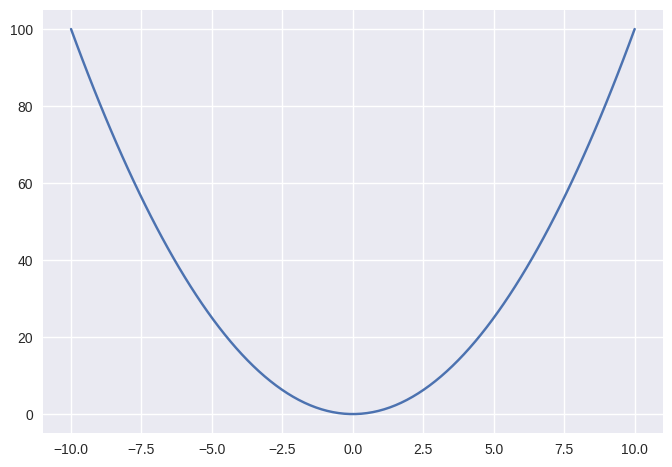

In [33]:
# Warm up
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)
plt.show() # This is not necessary in jupyter notebook or google colab but for a typical python program, you need this to show.

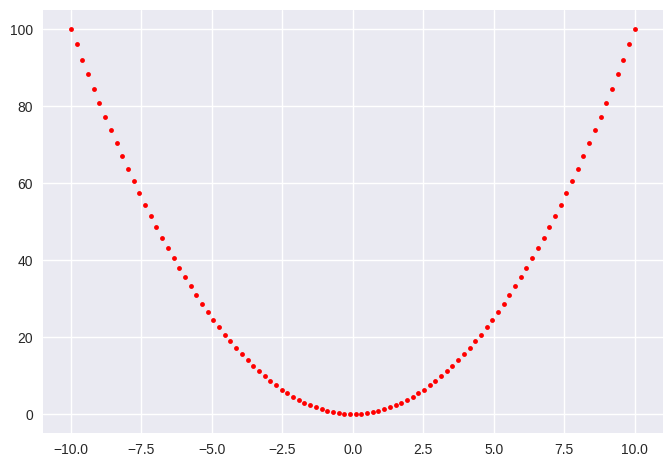

In [34]:
plt.plot(x,y,'r.') # Many options exist.

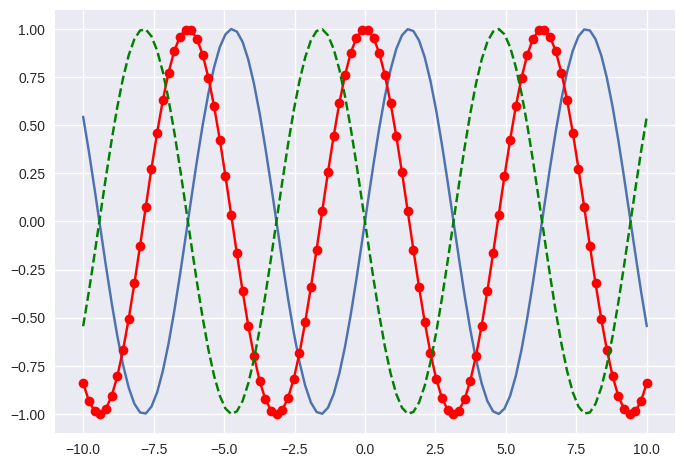

In [35]:
# If you use multiple plt.plot commands, plots will be integrated.
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x), 'r-o')
plt.plot(x,-np.sin(x), 'g--')
plt.show()

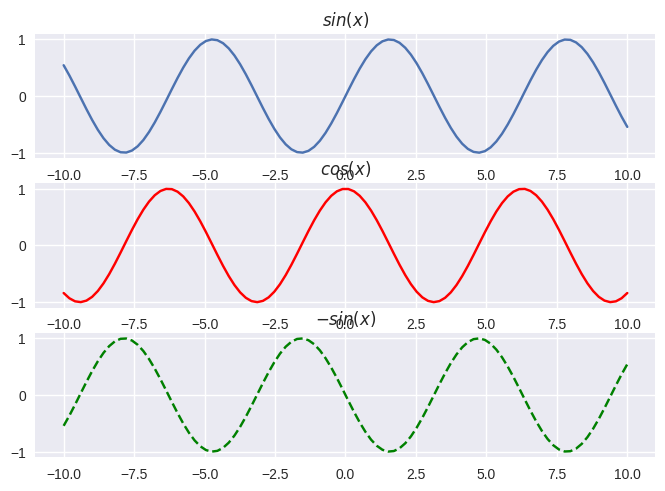

In [36]:
plt.subplot(3,1,1)
plt.plot(x,np.sin(x))
plt.title('$sin(x)$')

plt.subplot(3,1,2)
plt.plot(x,np.cos(x), 'r-')
plt.title('$cos(x)$')

plt.subplot(3,1,3)
plt.plot(x,-np.sin(x), 'g--')
plt.title('$-sin(x)$')
plt.show()

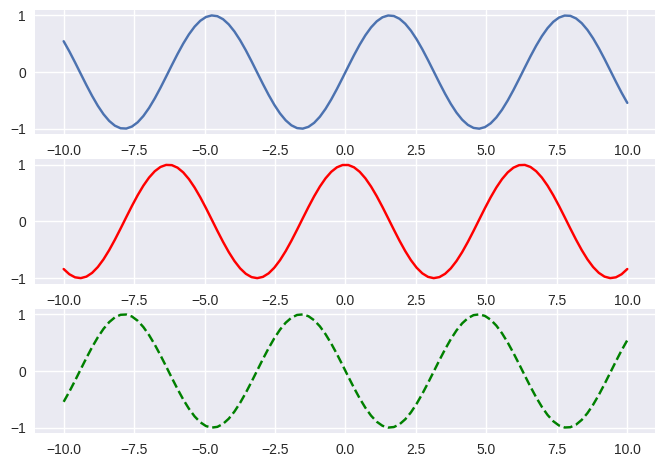

In [37]:
#Alternatively, you can use plt.subplots() function

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.plot(x,np.sin(x))
ax2.plot(x,np.cos(x), 'r-')
ax3.plot(x,-np.sin(x), 'g--')
plt.show()

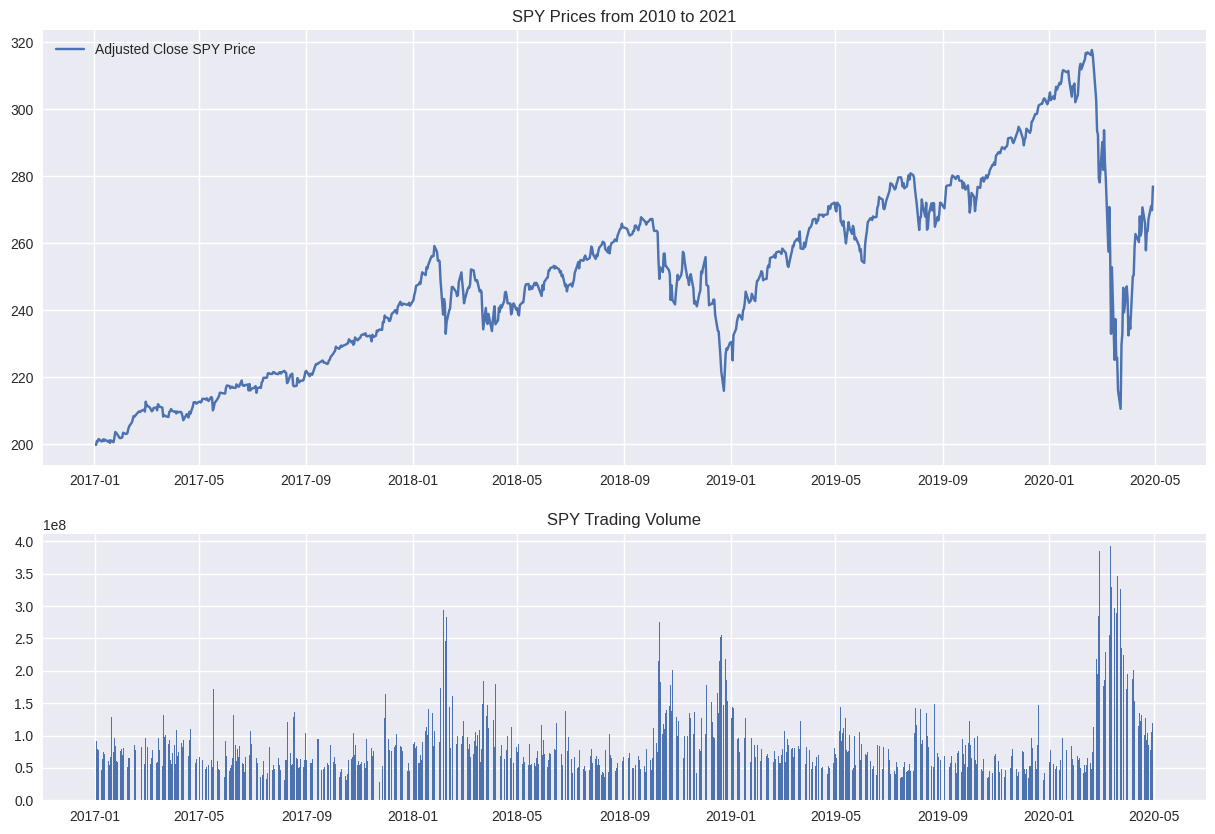

In [38]:
# Let's draw SPY prices and trading volumes over time using subplot
# subplot2grid() function gives more flexibility in producing axes and locatins of the grid of multiple figures

top = plt.subplot2grid((5,5), (0,0), rowspan=3,colspan=5)
top.plot(DSPY.index,DSPY.SPY,label='Adjusted Close SPY Price')
plt.title('SPY Prices from 2010 to 2021')
plt.legend(loc=2)

bottom = plt.subplot2grid((5,5),(3,0), rowspan=2,colspan=5)
bottom.bar(DSPY.index,DSPY.Volume)
plt.title('SPY Trading Volume')

plt.gcf().set_size_inches(15,10)
plt.subplots_adjust(hspace=0.7)

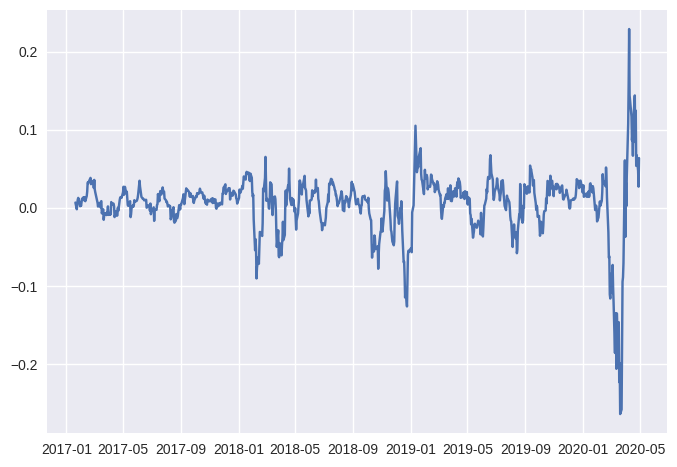

In [39]:
plt.plot(DSPY['SPY'].pct_change(periods=12))
plt.show() # A quick return computation using pct_change (annual returns)

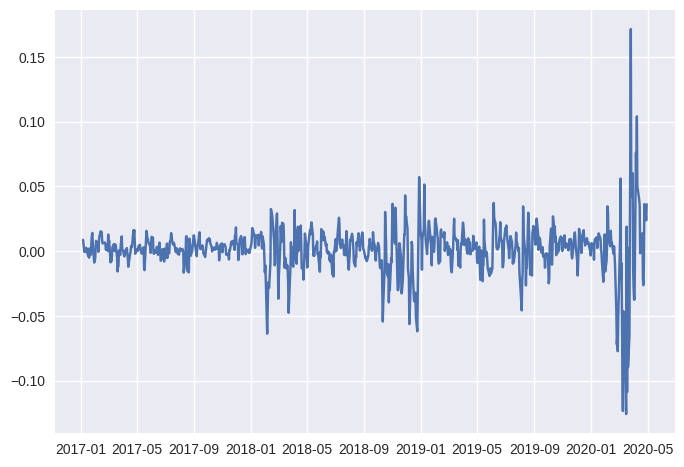

In [40]:
# For a quarterly-return figure, set periods = 3 for monthly data.
plt.plot(DSPY['SPY'].pct_change(periods=3))
plt.show()

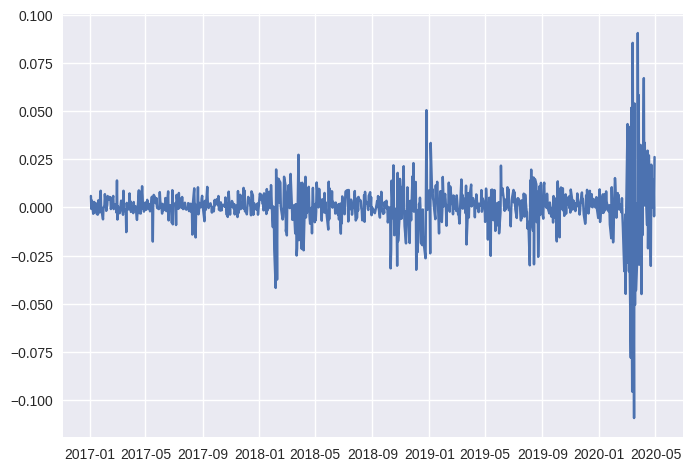

In [41]:
# For a monthly-return figure, set periods = 1 for monthly data.
plt.plot(DSPY['SPY'].pct_change(periods=1))
plt.show()

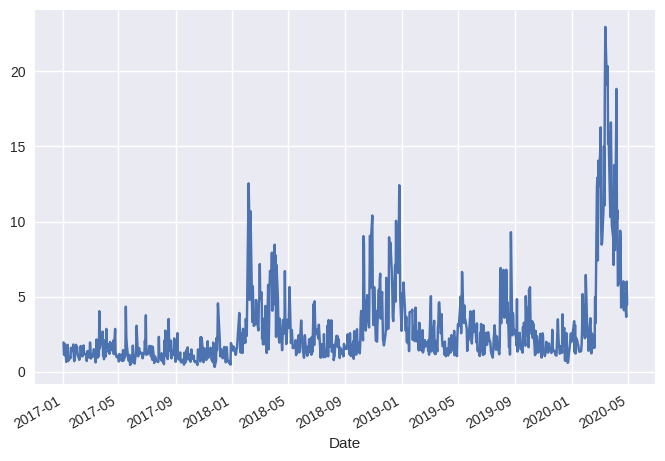

In [42]:
# Daily high minus low to consider short-term volatility
DSPY['HmL']=DSPY['High']-DSPY['Low']
DSPY['HmL'].plot()
plt.show()

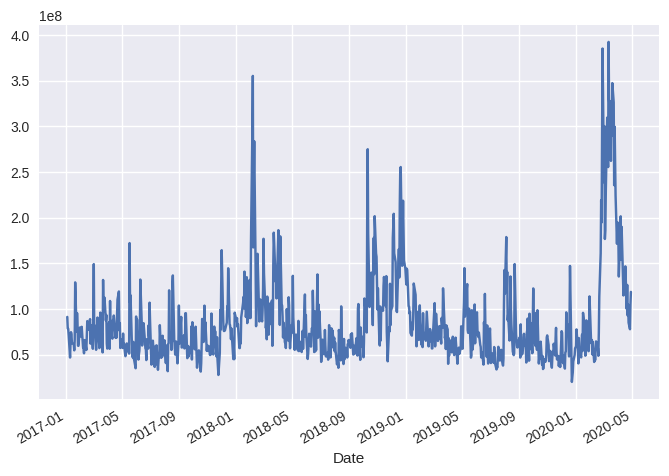

In [43]:
DSPY['Volume'].plot()
plt.show()

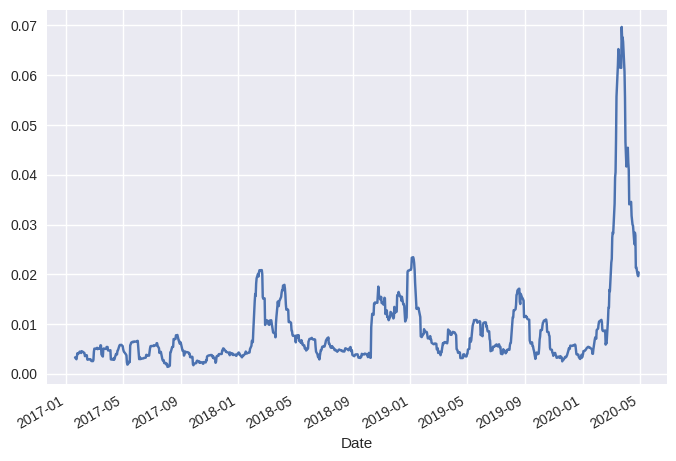

In [44]:
# Measuring and Plotting Volatility
# Use pct_change() rolling() and std()
# Pandas allows sequential applications of the above functions defined by . (eg., X().Y().Z())
SPY_Vol = DSPY['SPY'].pct_change(periods=1).rolling(window=12, min_periods=12).std()
SPY_Vol.plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


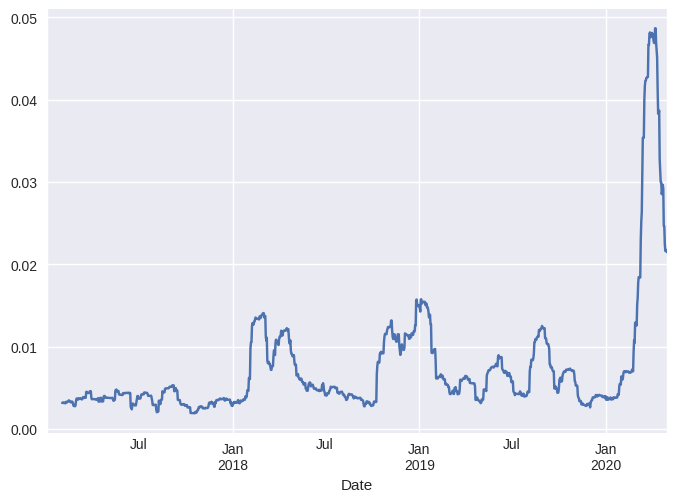

In [45]:
# For the return volatility, using high-frequency is desired. (^GSPC)
# It is called, 'realized volatility'
# To this end, I download the SPY data again with daily frequency.
SPYd = web.get_data_yahoo('SPY', start="2017-01-01", end="2020-04-30")

SPYd_fill = SPYd.asfreq('D',method='ffill') # This line is to fill in daily data so that missing observations due to holidays etc create issues.
SPYd_fill_ret = SPYd_fill['Adj Close'].pct_change(periods=1)
SPYd_Vol = SPYd_fill_ret.rolling(window=30, min_periods=30).std()
SPYd_Vol.plot()
plt.show()

<Axes: xlabel='Date', ylabel='Daily High minus Low Prices'>

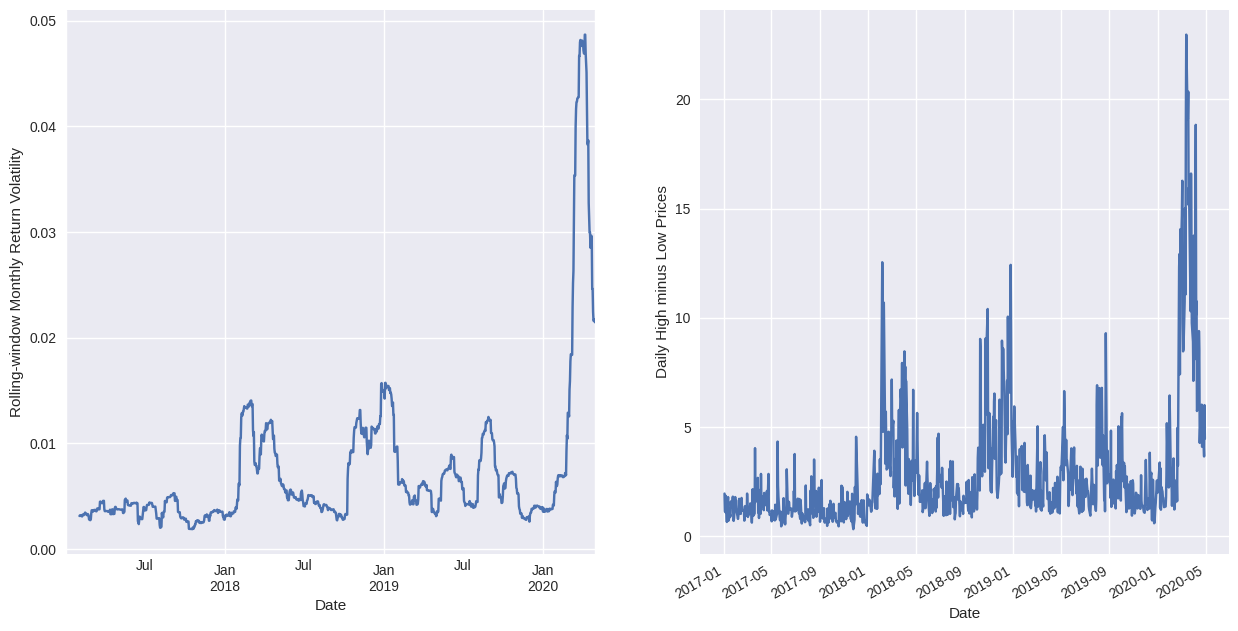

In [46]:
# With daily data, we can also draw daily high and low difference with more accuracy.

SPYHmL = SPYd['High']-SPYd['Low']

plt.figure(figsize=(15,8))
plt.subplot(121)
SPYd_Vol.plot()
plt.ylabel('Rolling-window Monthly Return Volatility')
plt.subplot(122)
plt.ylabel('Daily High minus Low Prices')
SPYHmL.plot()

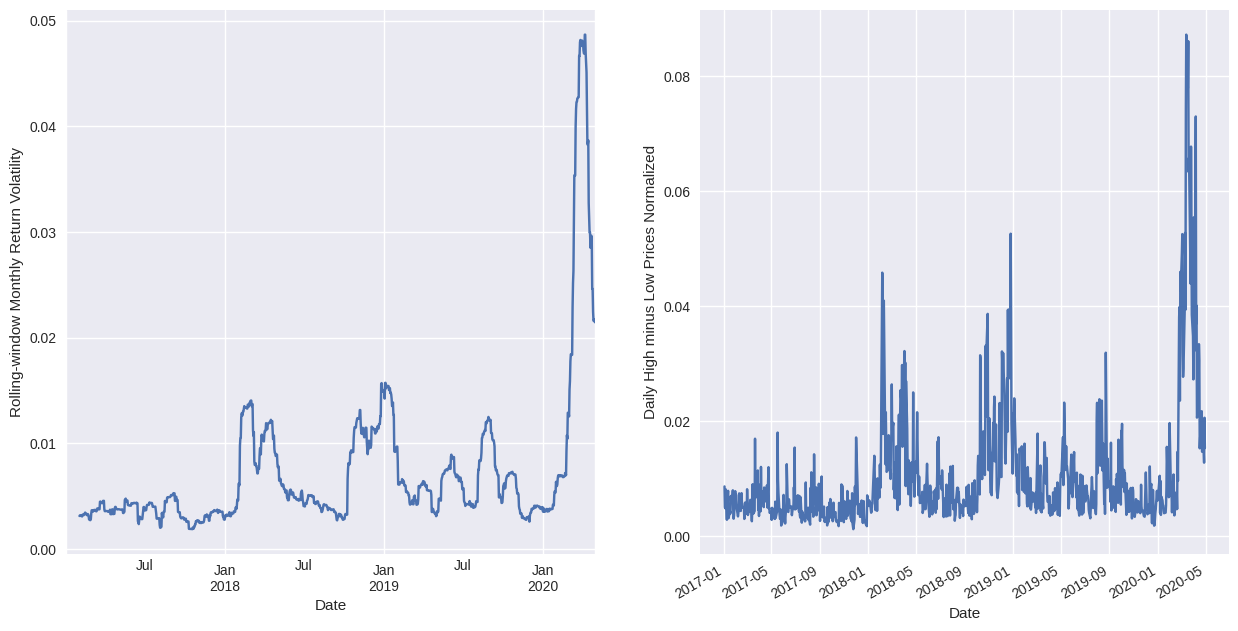

In [47]:
SPYHmL_norm = (SPYd['High']-SPYd['Low'])/SPYd['Open']
plt.figure(figsize=(15,8))
plt.subplot(121)
SPYd_Vol.plot()
plt.ylabel('Rolling-window Monthly Return Volatility')
plt.subplot(122)
plt.ylabel('Daily High minus Low Prices Normalized')
SPYHmL_norm.plot()
plt.show()


# Alternative ways to compute returns

In [48]:
data_AdjP.head()

Ticker,AAPL,AMZN,GOOG,MSFT,SPY,TSLA
Date,,,,,,
2017-01-03,26.989265,37.683498,39.306999,57.138729,199.819534,14.466000
2017-01-04,26.959061,37.859001,39.345001,56.883068,201.008301,15.132667
2017-01-05,27.096153,39.022499,39.701000,56.883068,200.848587,15.116667
2017-01-06,27.398232,39.799500,40.307499,57.376118,201.567200,15.267333
2017-01-09,27.649183,39.846001,40.332500,57.193504,200.901825,15.418667


In [49]:
print(data_AdjP.columns);print(data_AdjP.index)

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'SPY', 'TSLA'], dtype='object', name='Ticker')
DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', name='Date', length=836, freq=None)


In [50]:
type(data_AdjP)

pandas.core.frame.DataFrame

In [51]:
# We can use .shift() method

Ret = np.log(data_AdjP / data_AdjP.shift(1))

In [52]:
Ret.head() # .head() displays the last five rows

Ticker,AAPL,AMZN,GOOG,MSFT,SPY,TSLA
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001120,0.004646,0.000966,-0.004484,0.005932,0.045055
2017-01-05,0.005072,0.030270,0.009007,0.000000,-0.000795,-0.001058
2017-01-06,0.011087,0.019716,0.015161,0.008630,0.003571,0.009918
2017-01-09,0.009118,0.001168,0.000620,-0.003188,-0.003306,0.009863


In [53]:
Ret.tail() # .tail() displays the last five rows

Ticker,AAPL,AMZN,GOOG,MSFT,SPY,TSLA
Date,,,,,,
2020-04-23,-0.003883,0.015100,0.010317,-0.012176,-0.000071,-0.036840
2020-04-24,0.028461,0.004478,0.002348,0.018094,0.013842,0.027288
2020-04-27,0.000707,-0.014300,-0.002685,-0.002868,0.014316,0.096669
2020-04-28,-0.016342,-0.026406,-0.033643,-0.024663,-0.004609,-0.037801
2020-04-29,0.032318,0.025021,0.083780,0.043896,0.025842,0.040002


## Similar to the case of Series, we can extract or access the elements of dataframe via bracket notations ([]), but there are certain cases in which index names are unconventional and bracket notation does not work. In this case, .loc[] for index values or logical arrays, and .iloc[] for index numbers work well.

In [54]:
Ret.iloc[:,0] # AAPL returns using iloc

Date
2017-01-03         NaN
2017-01-04   -0.001120
2017-01-05    0.005072
2017-01-06    0.011087
2017-01-09    0.009118
                ...   
2020-04-23   -0.003883
2020-04-24    0.028461
2020-04-27    0.000707
2020-04-28   -0.016342
2020-04-29    0.032318
Name: AAPL, Length: 836, dtype: float64

In [55]:
Ret.loc[:,'AAPL']

Date
2017-01-03         NaN
2017-01-04   -0.001120
2017-01-05    0.005072
2017-01-06    0.011087
2017-01-09    0.009118
                ...   
2020-04-23   -0.003883
2020-04-24    0.028461
2020-04-27    0.000707
2020-04-28   -0.016342
2020-04-29    0.032318
Name: AAPL, Length: 836, dtype: float64

In [56]:
Ret.iloc[:5,:3]

Ticker,AAPL,AMZN,GOOG
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,-0.001120,0.004646,0.000966
2017-01-05,0.005072,0.030270,0.009007
2017-01-06,0.011087,0.019716,0.015161
2017-01-09,0.009118,0.001168,0.000620


In [57]:
#Try below. Does it work?
# Ret.loc[:5,['AAPL','AMZN','MSFT']]

In [58]:
Ret.loc[:'2012-11-01',['AAPL','AMZN','MSFT']]

Ticker,AAPL,AMZN,MSFT
Date,,,


In [59]:
Ret.iloc[:3,[1,3,-1]]

Ticker,AMZN,MSFT,TSLA
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.004646,-0.004484,0.045055
2017-01-05,0.030270,0.000000,-0.001058


In [60]:
Ret = Ret.dropna() #drops nan (missing values). If you want to specify values to drop, you can use drop(names), say drop('SPY')
Ret.head()

Ticker,AAPL,AMZN,GOOG,MSFT,SPY,TSLA
Date,,,,,,
2017-01-04,-0.001120,0.004646,0.000966,-0.004484,0.005932,0.045055
2017-01-05,0.005072,0.030270,0.009007,0.000000,-0.000795,-0.001058
2017-01-06,0.011087,0.019716,0.015161,0.008630,0.003571,0.009918
2017-01-09,0.009118,0.001168,0.000620,-0.003188,-0.003306,0.009863
2017-01-10,0.001008,-0.001281,-0.002309,-0.000319,0.000000,-0.006115


As mentioned above, in most cases, you can directly access rows and columns using a bracket or brackets.

In [61]:
Ret['SPY']

Date
2017-01-04    0.005932
2017-01-05   -0.000795
2017-01-06    0.003571
2017-01-09   -0.003306
2017-01-10    0.000000
                ...   
2020-04-23   -0.000071
2020-04-24    0.013842
2020-04-27    0.014316
2020-04-28   -0.004609
2020-04-29    0.025842
Name: SPY, Length: 835, dtype: float64

In [62]:
type(Ret['SPY']) #Series

pandas.core.series.Series

In [63]:
Ret['SPY'].head()

Date
2017-01-04    0.005932
2017-01-05   -0.000795
2017-01-06    0.003571
2017-01-09   -0.003306
2017-01-10    0.000000
Name: SPY, dtype: float64

In [64]:
Ret[['SPY']] # This is a DataFrame. Remember, DatFrame is a collection of columns (Series).

Ticker,SPY
Date,
2017-01-04,0.005932
2017-01-05,-0.000795
2017-01-06,0.003571
2017-01-09,-0.003306
2017-01-10,0.000000
...,...
2020-04-23,-0.000071
2020-04-24,0.013842
2020-04-27,0.014316


In [65]:
type(Ret[['SPY']] )

pandas.core.frame.DataFrame

In [66]:
Ret.describe() # Sum stats

Ticker,AAPL,AMZN,GOOG,MSFT,SPY,TSLA
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,0.001144,0.001373,0.000640,0.001316,0.000391,0.001563
std,0.019249,0.018578,0.017537,0.018158,0.012851,0.036668
min,-0.137708,-0.082535,-0.117667,-0.159454,-0.115887,-0.205522
25%,-0.005717,-0.006433,-0.005673,-0.005380,-0.002508,-0.014103
50%,0.001001,0.001631,0.000966,0.001427,0.000602,0.001164
75%,0.009620,0.009916,0.008785,0.009076,0.004853,0.018313
max,0.113158,0.124131,0.099380,0.132929,0.086731,0.181445


In [67]:
Ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 835 entries, 2017-01-04 to 2020-04-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    835 non-null    float64
 1   AMZN    835 non-null    float64
 2   GOOG    835 non-null    float64
 3   MSFT    835 non-null    float64
 4   SPY     835 non-null    float64
 5   TSLA    835 non-null    float64
dtypes: float64(6)
memory usage: 45.7 KB


In [68]:
Ticker2 = ["XOM","VLO","COP","MRO","CVX","JNJ","F"]
#data2 = web.DataReader(Ticker2, 'yahoo', sdate, edate)
data2 = web.get_data_yahoo(Ticker2, startd, endd)

[*********************100%%**********************]  7 of 7 completed


In [69]:
dcopy2 = data2.copy()
data2_AdjP = dcopy2['Adj Close']
Ret2 = np.log(data2_AdjP / data2_AdjP.shift(1))

In [70]:
Ret2.head()

Ticker,COP,CVX,F,JNJ,MRO,VLO,XOM
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.003660,-0.003465,-0.022545,-0.011645,0.005104,-0.038687,-0.008072
2020-01-06,0.011803,-0.003394,-0.005444,-0.001248,0.015157,0.000109,0.007649
2020-01-07,0.000000,-0.012852,0.009777,0.006088,-0.012252,0.013025,-0.008218
2020-01-08,-0.023438,-0.011488,0.000000,-0.000138,-0.037685,0.003875,-0.015195


If you want to add 'SPY' in Ret to Ret2, you can do the following.

In [71]:
Ret21 = Ret2.copy() #If you want to keep the original Ret2
#Ret21.loc[:,'SPY'] = Ret['SPY']
#Alternatively,
Ret21['SPY'] = Ret['SPY']

In [72]:
Ret21

Ticker,COP,CVX,F,JNJ,MRO,VLO,XOM,SPY
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009309
2020-01-03,0.003660,-0.003465,-0.022545,-0.011645,0.005104,-0.038687,-0.008072,-0.007601
2020-01-06,0.011803,-0.003394,-0.005444,-0.001248,0.015157,0.000109,0.007649,0.003808
2020-01-07,0.000000,-0.012852,0.009777,0.006088,-0.012252,0.013025,-0.008218,-0.002816
2020-01-08,-0.023438,-0.011488,0.000000,-0.000138,-0.037685,0.003875,-0.015195,0.005315
...,...,...,...,...,...,...,...,...
2021-12-27,0.027980,0.020239,0.026798,0.008404,0.034401,0.019330,0.014157,NaN
2021-12-28,-0.001230,-0.001938,-0.001925,0.004000,-0.004843,0.018561,-0.003237,NaN
2021-12-29,-0.002739,-0.005158,-0.009681,0.007020,0.005446,0.002011,-0.008792,NaN


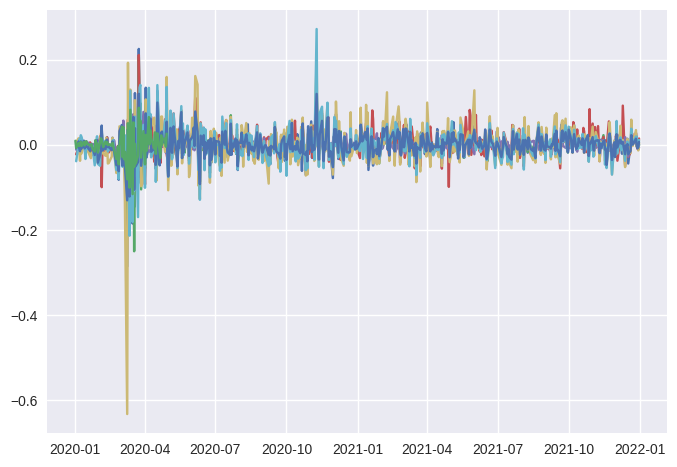

In [73]:
plt.plot(Ret21) # A quick plot
plt.show()

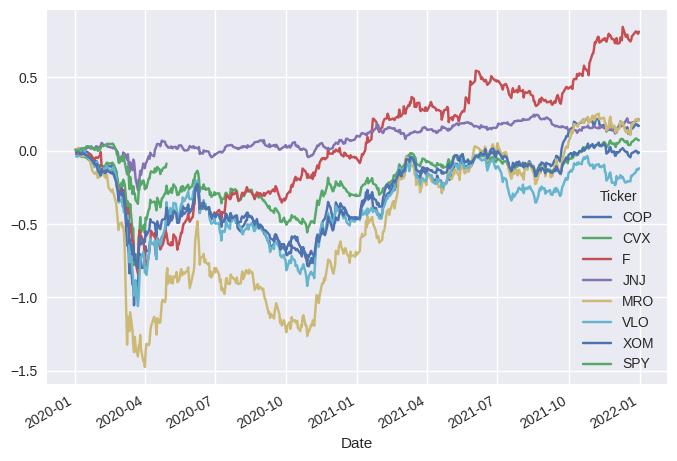

In [74]:
A=Ret21.cumsum()
A.plot()
plt.show()

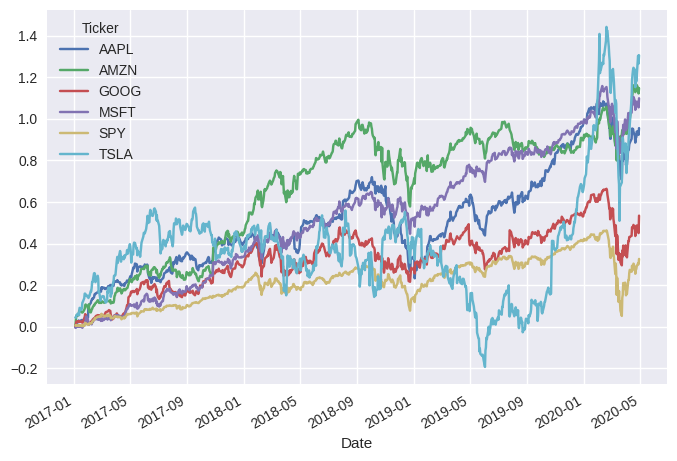

In [75]:
B=Ret.cumsum()
B.plot()
plt.show()

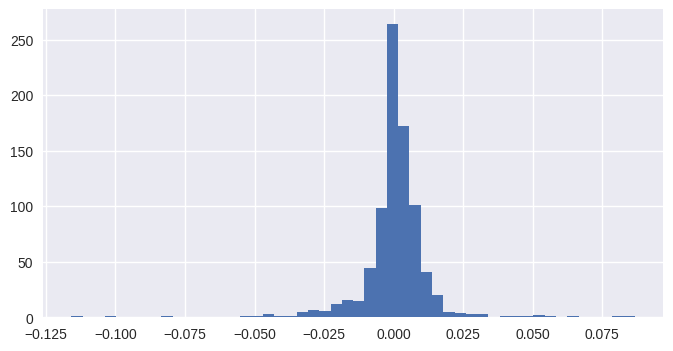

In [76]:
Ret['SPY'].hist(bins=50, figsize=(8,4))
plt.show()

In [77]:
!pwd

/content


# Questions) Say, you want to compare these stocks with existing factors or the interest rates. Plus, you also want to check how business cycles or economic growth affect these stocks and vice versa. What should you do?